In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train.shape

(891, 12)

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Accordin to data we need to add two data sets and verify

# Replacing Null values in 'Age' Column its a Contineous column
* Here Age columnis Float

In [6]:
train['Age'].isnull().sum()

177

In [7]:
train['Age'].isnull().mean()*100

19.865319865319865

In [8]:
test['Age'].isnull().mean()*100

20.574162679425836

In [9]:
train['Age'].agg(['sum','min'])

sum    21205.17
min        0.42
Name: Age, dtype: float64

In [10]:
#train.Age.rolling(window=5,min_periods=1).agg(['sum','min'])

* Comparing to 'train_data' and 'test_data' test data have more missing value mean

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


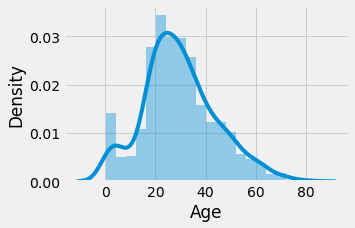

In [11]:
plt.rcParams['figure.figsize'] = (10,3)
plt.style.use('fivethirtyeight')


plt.subplot(1,2,2)
sns.distplot(train['Age'])
plt.show()

# 1.Replacing Mean and Medain

* First appling on Train dataset

In [12]:
X = train[['Age','Fare']]
y = train['Survived']

In [13]:
X.head()

Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [18]:
X_train.isnull().mean()

Age     0.196629
Fare    0.000000
dtype: float64

In [19]:
#Test data havin more percentage
X_test.isnull().mean()

Age     0.206704
Fare    0.000000
dtype: float64

In [20]:
# Creating a new columns
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

In [21]:
mean_age

29.498846153846156

In [22]:
median_age

28.0

In [23]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

<ipython-input-23-e42c49c78a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_median'] = X_train['Age'].fillna(median_age)
<ipython-input-23-e42c49c78a55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_mean'] = X_train['Age'].fillna(mean_age)


# Checking " Variance" of the Age Column

In [24]:
print('Original Age variable variance: ', X_train['Age'].var())
print()
# replacing the 'Mean' and 'Median' values
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

Original Age variable variance:  210.2517072477438

Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225


In [25]:
import matplotlib.pyplot as plt

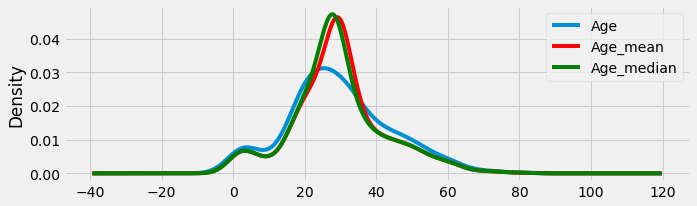

In [26]:
fig = plt.figure()
ax= fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind = 'kde' , ax = ax)

#Variable imputed with mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color = 'red')

#Variable imputed with Median
X_train['Age_median'].plot(kind='kde',ax=ax,color = 'green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<AxesSubplot:>

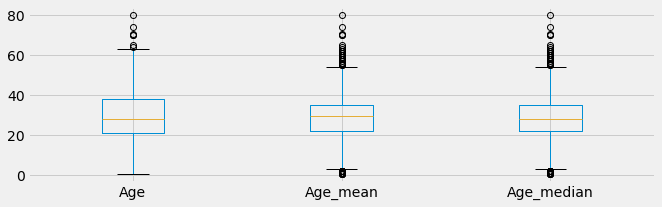

In [27]:
X_train[['Age','Age_mean','Age_median']].boxplot()

# 2.Replacing Orbitary values 

In [29]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

<ipython-input-29-9c7dfee22c3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_99'] = X_train['Age'].fillna(99)
<ipython-input-29-9c7dfee22c3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_minus1'] = X_train['Age'].fillna(-1)


In [30]:
print('Original Age variable variance: ', X_train['Age'].var())
print()
# replacing the 'Mean' and 'Median' values
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())
print()
# replacing the Orbitary Columns

print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

Original Age variable variance:  210.2517072477438

Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225

Age Variance after 99 wala imputation:  932.9665366701436
Age Variance after -1 wala imputation:  315.99550362600644


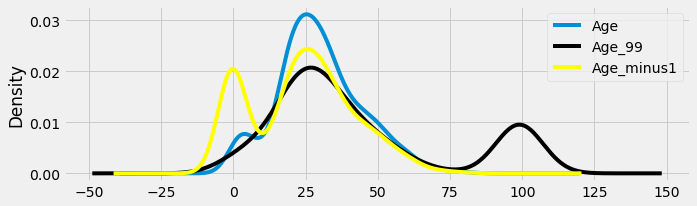

In [31]:
fig = plt.figure()
ax= fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind = 'kde' , ax = ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='black')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='yellow')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<AxesSubplot:>

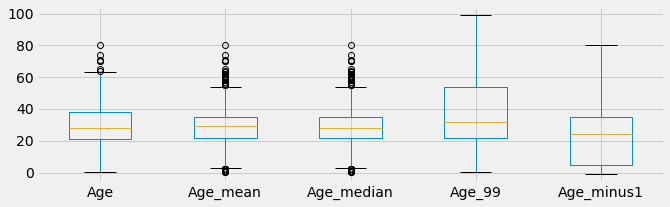

In [32]:
X_train[['Age','Age_mean','Age_median','Age_99','Age_minus1']].boxplot()

# 3.Replacing the Random Values

In [33]:
X_train['Age_imputed'] = X_train['Age']

<ipython-input-33-486dc8508d78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imputed'] = X_train['Age']


In [34]:
# Finding Null values in the data set
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

29    NaN
55    NaN
533   NaN
495   NaN
468   NaN
       ..
330   NaN
214   NaN
466   NaN
121   NaN
270   NaN
Name: Age_imputed, Length: 140, dtype: float64

In [35]:
# Filling Missing values with sample Orginal values
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] =X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [36]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 48.  , 33.  , 18.  , 44.  , 28.  , 28.  , 36.  , 20.  ,
       35.  , 60.  ,  7.  , 17.  , 19.  , 26.  , 30.  ,  5.  , 18.  ,
       45.  , 26.  , 25.  , 74.  , 60.  , 24.  , 16.  , 47.  , 28.  ,
       24.  , 22.  , 24.  , 23.  ,  4.  ,  3.  , 21.  , 50.  , 28.  ,
       29.  , 24.  , 36.  , 20.  ,  8.  , 64.  , 18.  , 17.  , 65.  ,
       21.  , 25.  , 33.  , 35.  , 20.  , 43.  , 40.  , 16.  , 33.  ,
       43.  , 25.  , 30.  , 63.  , 23.  , 44.  , 50.  , 35.  , 30.  ,
       31.  , 36.  , 29.  , 22.  , 28.  , 18.  , 33.  , 38.  ,  9.  ,
       25.  , 30.  , 33.  , 31.  , 28.  , 70.5 ,  9.  , 22.  , 46.  ,
       47.  , 28.5 , 70.  ,  8.  , 25.  , 37.  , 33.  , 43.  , 39.  ,
        0.83, 62.  , 38.  , 29.  ,  6.  ,  4.  ,  1.  , 54.  , 25.  ,
       47.  , 40.  , 27.  , 54.  , 51.  , 19.  , 32.  ,  4.  ,  0.75,
       45.  ,  2.  , 22.  , 40.  , 27.  , 34.5 , 36.  , 29.  , 25.  ,
       23.  , 40.5 ,  3.  , 38.  , 42.  , 51.  , 42.  ,  2.  , 32.  ,
       28.  , 43.  ,

In [37]:
X_train['Age'].isnull().sum()

140

In [38]:
print('Original Age variable variance: ', X_train['Age'].var())
print()
# replacing the 'Mean' and 'Median' values
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())
print()
# replacing the Orbitary Columns

print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())
print()

#replacing Random Samples in the data
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original Age variable variance:  210.2517072477438

Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225

Age Variance after 99 wala imputation:  932.9665366701436
Age Variance after -1 wala imputation:  315.99550362600644

Variance after random imputation:  202.81215410404712


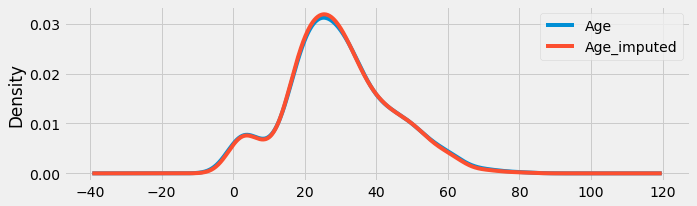

In [39]:
fig = plt.figure()
ax= fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind = 'kde' , ax = ax)

# replacing the Random values in the age column
X_train['Age_imputed'].plot(kind = 'kde',ax=ax)


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<AxesSubplot:>

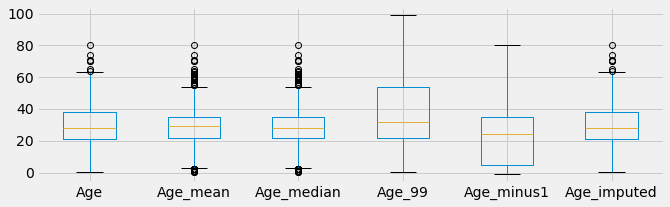

In [40]:
X_train[['Age','Age_mean','Age_median','Age_99','Age_minus1','Age_imputed']].boxplot()

In [41]:
X_train

Age      Fare  Age_median   Age_mean  Age_99  Age_minus1  Age_imputed
331  45.5   28.5000        45.5  45.500000    45.5        45.5         45.5
733  23.0   13.0000        23.0  23.000000    23.0        23.0         23.0
382  32.0    7.9250        32.0  32.000000    32.0        32.0         32.0
704  26.0    7.8542        26.0  26.000000    26.0        26.0         26.0
813   6.0   31.2750         6.0   6.000000     6.0         6.0          6.0
..    ...       ...         ...        ...     ...         ...          ...
106  21.0    7.6500        21.0  21.000000    21.0        21.0         21.0
270   NaN   31.0000        28.0  29.498846    99.0        -1.0         58.0
860  41.0   14.1083        41.0  41.000000    41.0        41.0         41.0
435  14.0  120.0000        14.0  14.000000    14.0        14.0         14.0
102  21.0   77.2875        21.0  21.000000    21.0        21.0         21.0

[712 rows x 7 columns]

# 4.Replacing for Numeric values Knn_Imputator

In [42]:
from sklearn.impute import KNNImputer,SimpleImputer

In [43]:
# Here distance is b/w the column numbers
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train[['Age']])
X_test_trf = knn.transform(X_test[['Age']])

In [44]:
X_train_trf.shape

(712, 1)

In [45]:
X_test_trf.shape

(179, 1)

# Comparision with Simple Imputer --> mean

In [46]:

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train[['Age']])
X_test_trf2 = si.transform(X_test[['Age']])

In [47]:
X_train_trf2

array([[45.5       ],
       [23.        ],
       [32.        ],
       [26.        ],
       [ 6.        ],
       [24.        ],
       [45.        ],
       [29.        ],
       [29.49884615],
       [29.49884615],
       [42.        ],
       [36.        ],
       [33.        ],
       [17.        ],
       [29.        ],
       [50.        ],
       [35.        ],
       [38.        ],
       [34.        ],
       [17.        ],
       [11.        ],
       [61.        ],
       [30.        ],
       [ 7.        ],
       [63.        ],
       [20.        ],
       [29.49884615],
       [29.        ],
       [36.        ],
       [29.49884615],
       [50.        ],
       [27.        ],
       [30.        ],
       [33.        ],
       [29.49884615],
       [29.49884615],
       [ 2.        ],
       [25.        ],
       [51.        ],
       [25.        ],
       [29.49884615],
       [29.49884615],
       [24.        ],
       [18.        ],
       [29.49884615],
       [25

* We go wiht Age column with 'Mean' or "Age Imputed"

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [54]:
train.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [59]:
train['Pclass'].isnull().sum()

0

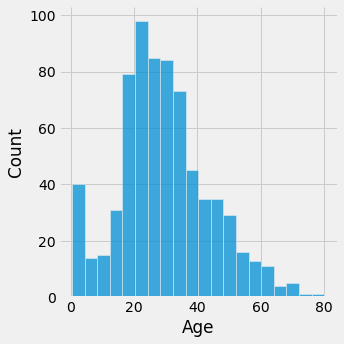

In [66]:
sns.displot(train.Age)

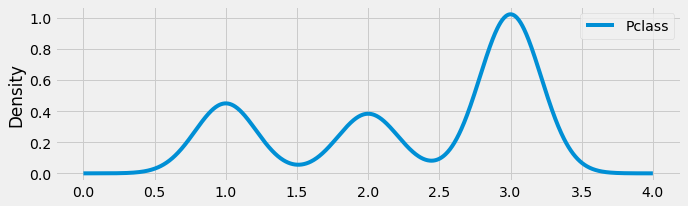

In [61]:
fig = plt.figure()
ax= fig.add_subplot(111)


# replacing the Random values in the age column
train['Pclass'].plot(kind = 'kde',ax=ax)


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

* Its a left skew data

<AxesSubplot:>

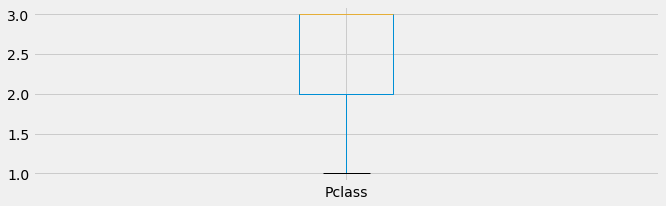

In [64]:
train[['Pclass']].boxplot()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

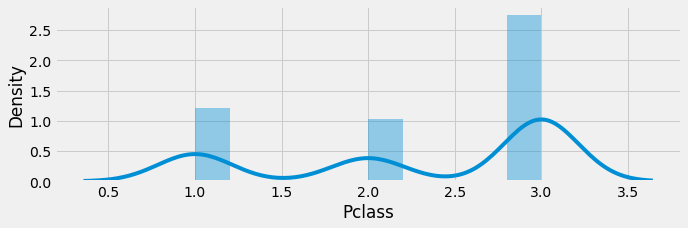

In [65]:
sns.distplot(train.Pclass)

### Feature: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

#### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

We can see with this feature, the values are numerical (1, 2 and 3) but they are categories.

How do we know this? Because a passenger in Class 3 doesn't necessarily equal a passenger in Class 2 + a passenger in Class 1.

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Passenger Id not imported column

In [70]:
train['PassengerId'].isnull().sum()

0

In [71]:
train['PassengerId'].unique

<bound method Series.unique of 0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64>